In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science - Google Collaboratory/DS Dibimbing/Latihan Coding/Assignment Day 31 - Support Vector Machine/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(None,
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0          1    15634602  Hargrave          619    France  Female   42   
 1          2    15647311      Hill          608     Spain  Female   41   
 2          3    15619304      Onio          502    France  Female   42   
 3          4    15701354      Boni          699    France  Female   39   
 4          5    15737888  Mitchell          850     Spain  Female   43   
 
    Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
 0       2       0.00              1          1               1   
 1       1   83807.86              1          0               1   
 2       8  159660.80              3          1               0   
 3       1       0.00              2          0               0   
 4       2  125510.82              1          1               1   
 
    EstimatedSalary  Exited  
 0        101348.88       1  
 1        112542.58       0  
 2        113931.57       1  
 3         93826.

# 1. Preprosessing Data

In [ ]:
# Step 1: Preprocessing Data

# Check for missing values
missing_values = df.isnull().sum()

# Drop unnecessary columns (RowNumber, CustomerId, Surname) that are irrelevant for modeling
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Check for duplicate rows
duplicates = df.duplicated().sum()

# Display preprocessing results
{
    "Missing Values": missing_values,
    "Number of Duplicates": duplicates,
    "Dataset Shape After Cleanup": df.shape
}

{'Missing Values': RowNumber          0
 CustomerId         0
 Surname            0
 CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 'Number of Duplicates': 0,
 'Dataset Shape After Cleanup': (10000, 11)}

# 2. Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 2: Feature Engineering

# Encode categorical variables (Geography and Gender)
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features (CreditScore, Age, Balance, EstimatedSalary)
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

# Display the first few rows after feature engineering
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,0.388871,2,0.785728,1,1,1,-0.365276,0


# 3. Exploratory Data Analysis (EDA)

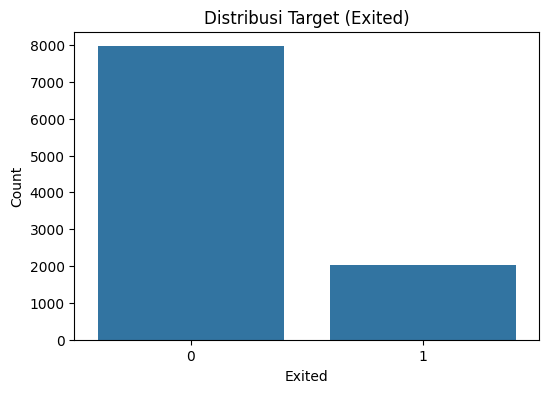

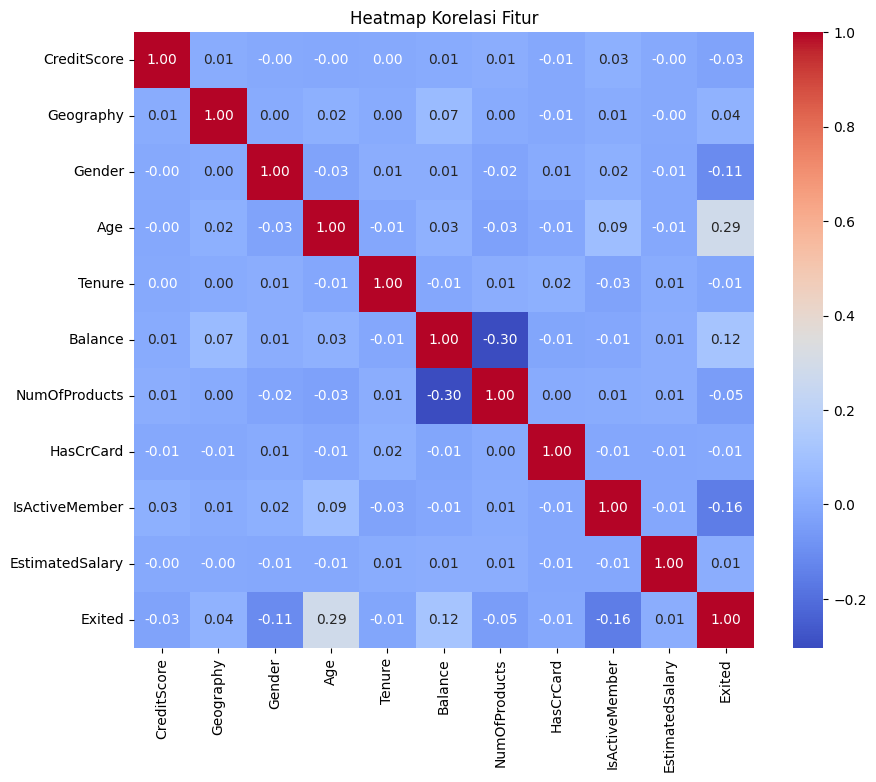

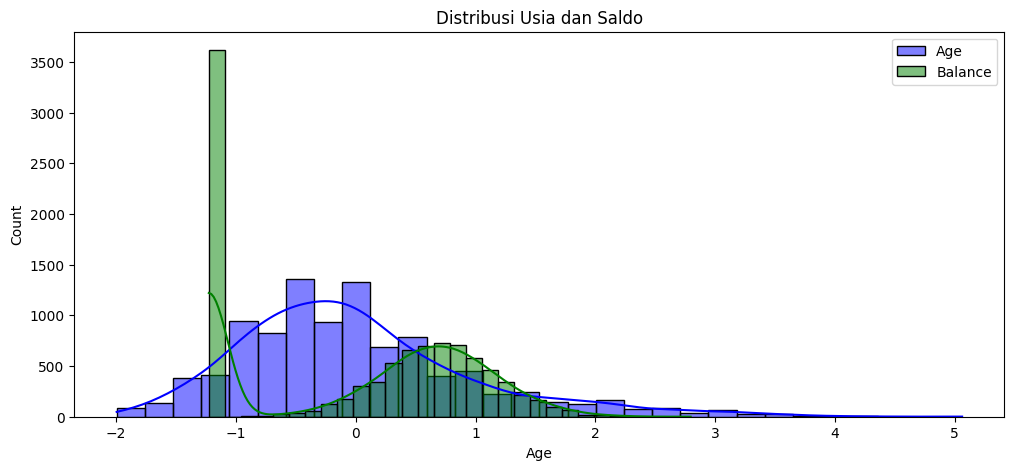

In [ ]:
# Visualize the distribution of the target variable (Exited)
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Target (Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap Korelasi Fitur')
plt.show()

# Distribution of balance and age
plt.figure(figsize=(12, 5))
sns.histplot(df['Age'], kde=True, bins=30, color='blue', label='Age')
sns.histplot(df['Balance'], kde=True, bins=30, color='green', label='Balance', alpha=0.5)
plt.title('Distribusi Usia dan Saldo')
plt.legend()
plt.show()

# Hasil dari Exploratory Data Analysis (EDA):

1. Distribusi Target (Exited):
Proporsi pelanggan yang "Exited" (churn) lebih sedikit dibandingkan yang tidak, menunjukkan data tidak seimbang.

2. Heatmap Korelasi:
- Fitur seperti Age dan Balance memiliki korelasi yang lebih signifikan terhadap target (Exited).
- Fitur seperti NumOfProducts dan IsActiveMember juga menunjukkan hubungan moderat dengan churn.

3. Distribusi Usia dan Saldo:

- Usia pelanggan menunjukkan distribusi yang sedikit terpusat di sekitar usia 35-40 tahun.
- Sebagian besar pelanggan memiliki saldo mendekati nol, dengan sebagian kecil memiliki saldo yang lebih tinggi.

# 4. Model machine learning dengan menerapkan SVM dan membandingkan dengan Logistic Regression dan Evaluasi Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 4: Machine Learning Models

# Separate features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Model 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Model 2: Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate both models
svm_results = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_svm),
    "Classification Report": classification_report(y_test, y_pred_svm)
}

logistic_results = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_logistic),
    "Classification Report": classification_report(y_test, y_pred_logistic)
}

svm_results, logistic_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


({'Accuracy': 0.7963333333333333,
  'Confusion Matrix': array([[2389,    0],
         [ 611,    0]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      2389\n           1       0.00      0.00      0.00       611\n\n    accuracy                           0.80      3000\n   macro avg       0.40      0.50      0.44      3000\nweighted avg       0.63      0.80      0.71      3000\n'},
 {'Accuracy': 0.8153333333333334,
  'Confusion Matrix': array([[2347,   42],
         [ 512,   99]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.82      0.98      0.89      2389\n           1       0.70      0.16      0.26       611\n\n    accuracy                           0.82      3000\n   macro avg       0.76      0.57      0.58      3000\nweighted avg       0.80      0.82      0.77      3000\n'})

# 1. Support Vector Machine (SVM):
- Akurasi: 79.6%
- Confusion Matrix :

[[2389    0]
[ 611    0]]

- Classification Report: Precision dan recall untuk kelas 1 sangat rendah (model tidak mampu memprediksi churn dengan baik).

# 2. Logistic Regression:
- Akurasi: 81.5%
- Confusion Matrix:

[[2347   42]
 [ 512   99]]

- Classification Report:
* Precision untuk kelas 1 (churn): 70%

* Recall untuk kelas 1: 16%
* Logistic Regression sedikit lebih baik dibanding SVM dalam memprediksi churn meskipun masih lemah.

# Insight Bisnis:

1. Identifikasi Pelanggan Berisiko Churn:
Logistic Regression menunjukkan akurasi lebih baik dalam memprediksi churn meskipun recall untuk kelas churn masih rendah. Perlu strategi untuk meningkatkan prediksi pelanggan churn agar lebih proaktif dalam menjaga mereka.

2. Segmentasi Pelanggan:
Pelanggan dengan usia lebih tua dan saldo lebih tinggi cenderung lebih rentan terhadap churn. Hal ini dapat digunakan untuk membuat program loyalitas yang lebih fokus pada segmen ini.

3. Peran Aktivitas dan Produk:
Fitur seperti IsActiveMember dan NumOfProducts memiliki hubungan yang cukup signifikan dengan churn. Menawarkan produk yang sesuai dan mendorong keterlibatan lebih aktif dapat membantu mempertahankan pelanggan.

4. Intervensi Khusus:
Data menunjukkan bahwa churn sebagian besar berasal dari pelanggan yang memiliki nilai prediktif rendah terhadap loyalitas. Kampanye personalisasi seperti diskon, program reward, atau layanan tambahan dapat efektif dalam mempertahankan mereka.

5. Optimasi Model:
Imbalance data pada churn memengaruhi performa model. Meningkatkan model dengan teknik seperti oversampling (SMOTE) atau undersampling dapat membantu meningkatkan recall pada kelas churn.

Langkah selanjutnya bisa mencakup implementasi strategi bisnis atau pengembangan model lebih lanjut untuk meningkatkan performa.

# 5. Klasifikasikan siapa customer yang churn dan siapa customer yang tidak churn

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(
    df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])

# Separate features and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression with class weights to handle imbalanced data
logistic_model_weighted = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model_weighted.fit(X_train, y_train)
y_pred_weighted = logistic_model_weighted.predict(X_test)

# Evaluate the model
classification_report_weighted = classification_report(y_test, y_pred_weighted)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

# Adding the predicted churn status to the original dataset
df['Churn_Predicted'] = logistic_model_weighted.predict(X)

# Display the classification results and churn predictions
{
    "Accuracy with Class Weights": accuracy_weighted,
    "Classification Report with Class Weights": classification_report_weighted,
    "Sample of Churn Predictions": df[['Exited', 'Churn_Predicted']].head(10)
}

{'Accuracy with Class Weights': 0.7123333333333334,
 'Classification Report with Class Weights': '              precision    recall  f1-score   support\n\n           0       0.91      0.71      0.80      2389\n           1       0.39      0.72      0.51       611\n\n    accuracy                           0.71      3000\n   macro avg       0.65      0.72      0.65      3000\nweighted avg       0.80      0.71      0.74      3000\n',
 'Sample of Churn Predictions':    Exited  Churn_Predicted
 0       1                0
 1       0                0
 2       1                1
 3       0                1
 4       0                1
 5       1                1
 6       0                0
 7       1                1
 8       0                0
 9       0                0}

- Pelanggan ke-1: Asli churn (1), Prediksi tidak churn (0)
- Pelanggan ke-3: Asli churn (1), Prediksi churn (1)
- Pelanggan ke-5: Asli tidak churn (0), Prediksi churn (1)

1. Penggunaan Data dan Proses Standarisasi
Fitur numerik seperti CreditScore, Age, Balance, dan EstimatedSalary distandarisasi menggunakan StandardScaler. Hal ini penting untuk model berbasis gradien seperti regresi logistik agar setiap fitur memiliki skala yang sama dan mempercepat konvergensi model.

2. Masalah Ketidakseimbangan Data
- Target variabel Exited memiliki ketidakseimbangan kelas, terlihat dari laporan klasifikasi bahwa terdapat 2389 data kelas 0 (tidak keluar) dan 611 data kelas 1 (keluar).
- Ketidakseimbangan ini ditangani dengan parameter class_weight='balanced' di model regresi logistik, yang memberikan bobot lebih tinggi pada kelas minoritas untuk mengurangi bias terhadap kelas mayoritas.

3. Evaluasi Model
Accuracy: Model mencapai akurasi sekitar 71.2%. Namun, akurasi saja tidak mencerminkan performa keseluruhan karena data tidak seimbang.

- Precision, Recall, F1-Score:

- Untuk kelas 0 (tidak keluar):
Precision: 0.91 menunjukkan tingkat keberhasilan prediksi kelas 0 yang benar.
Recall: 0.71 menunjukkan tingkat keberhasilan model dalam menangkap semua instance kelas 0.

- Untuk kelas 1 (keluar):
Precision: 0.39 rendah karena model memiliki banyak prediksi positif yang salah.
Recall: 0.72 lebih baik karena model mampu menangkap sebagian besar instance kelas 1.

- F1-Score Kelas 1: 0.51 menandakan kinerja yang cukup baik meskipun ada ruang untuk perbaikan.

# Rekomendasi Bisnis

1.  Fokus pada Pelanggan Berisiko Tinggi
Berdasarkan analisis churn, identifikasi pelanggan yang memiliki kemungkinan besar untuk keluar (churn). Anda dapat menggunakan kolom prediksi churn (Churn_Predicted) untuk memberikan prioritas pada pelanggan ini.

Strategi:
Tawarkan insentif seperti diskon, promosi, atau program loyalitas.
Berikan layanan pelanggan yang lebih personal untuk memastikan kepuasan mereka.
Kirimkan survei atau tanyakan umpan balik untuk memahami alasan mereka mungkin ingin keluar.

2. Analisis Segmentasi Pelanggan
Gunakan data pelanggan (seperti usia, saldo, dan gaji yang diestimasi) untuk membuat segmentasi pelanggan yang lebih spesifik.

Strategi:
Buat kampanye pemasaran yang disesuaikan dengan setiap segmen.
Prioritaskan segmen pelanggan dengan potensi pendapatan tinggi atau segmen yang memiliki risiko churn tinggi.

3. Tingkatkan Pengalaman Pelanggan
Dari data churn, identifikasi faktor-faktor utama yang menyebabkan churn (misalnya, kurangnya engagement, masalah layanan, atau produk yang tidak relevan).

Strategi:
Tingkatkan kualitas layanan atau produk berdasarkan umpan balik pelanggan.
Sediakan panduan onboarding yang efektif untuk pelanggan baru.
Ciptakan pengalaman pengguna (user experience) yang lebih intuitif dan menarik.

4. Program Loyalitas dan Retensi
Pelanggan yang setia lebih kecil kemungkinannya untuk churn, jadi penting untuk menciptakan hubungan jangka panjang.

Strategi:
Bangun program loyalitas seperti poin reward untuk pembelian atau penggunaan layanan.
Kirimkan penawaran eksklusif kepada pelanggan yang sudah lama menggunakan layanan Anda.

5. Personalisasi Penawaran
Gunakan data pelanggan untuk membuat penawaran yang sangat personal.

Strategi:
Tawarkan produk atau layanan berdasarkan pola pembelian atau kebutuhan pelanggan tertentu.
Kirimkan email atau notifikasi yang relevan, misalnya, "Kami melihat Anda tertarik pada [produk/layanan tertentu]. Berikut adalah diskon khusus untuk Anda!"

6. Diversifikasi Produk atau Layanan
Analisis churn dapat memberikan wawasan tentang kebutuhan pelanggan yang belum terpenuhi.

Strategi:
Tambahkan fitur atau produk baru yang relevan untuk pelanggan Anda.
Perluas layanan agar lebih fleksibel dan menarik bagi berbagai segmen pelanggan.
